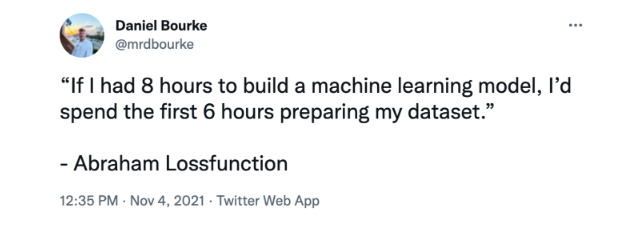

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("synthetic_data.csv")

In [3]:
df

,Unnamed: 0,Payload (Ton),Empty Travel Distance (km),Load Travel Distance (km),Empty Speed (km/hr),Load Speed (km/hr),Empty Travel Time (hr),Empty Stop Time (hr),Load Time (hr),Load Stop Time (hr),Load Travel Time (hr),TKPH (Ton.Km/Hr)
0,0,153.689871,3.458257,1.731073,13.853573,17.722950,0.094863,0.001000,0.059778,0.016736,0.137024,71.884526
1,1,142.843169,3.058542,2.183726,17.734274,20.612661,0.093944,0.020299,0.026000,0.012971,0.147496,111.959138
2,2,156.268816,2.330209,1.631066,19.389591,20.783555,0.053000,0.003187,0.058721,0.015621,0.127955,80.599379
3,3,171.221396,1.735279,2.044309,27.915883,22.361973,0.097767,0.024860,0.044494,0.022718,0.052000,156.645315
4,4,141.205192,2.867904,0.800000,22.984029,15.975268,0.130718,0.043222,0.058612,0.027223,0.105716,273.406861
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,140.403245,3.181067,2.373091,21.027435,20.550993,0.113316,0.038617,0.065000,0.017813,0.155237,170.718995
996,996,175.913081,2.257669,2.526863,13.223707,23.191018,0.143732,0.097297,0.052905,0.026338,0.052000,179.727040
997,997,156.151878,1.537462,1.247778,19.735297,30.000000,0.070260,0.025994,0.035473,0.029708,0.087019,271.482034
998,998,135.448120,2.142698,2.592052,27.010716,23.526502,0.122506,0.054719,0.065000,0.011520,0.127856,229.782082


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.head()

,Payload (Ton),Empty Travel Distance (km),Load Travel Distance (km),Empty Speed (km/hr),Load Speed (km/hr),Empty Travel Time (hr),Empty Stop Time (hr),Load Time (hr),Load Stop Time (hr),Load Travel Time (hr),TKPH (Ton.Km/Hr)
0,153.689871,3.458257,1.731073,13.853573,17.722950,0.094863,0.001000,0.059778,0.016736,0.137024,71.884526
1,142.843169,3.058542,2.183726,17.734274,20.612661,0.093944,0.020299,0.026000,0.012971,0.147496,111.959138
2,156.268816,2.330209,1.631066,19.389591,20.783555,0.053000,0.003187,0.058721,0.015621,0.127955,80.599379
3,171.221396,1.735279,2.044309,27.915883,22.361973,0.097767,0.024860,0.044494,0.022718,0.052000,156.645315
4,141.205192,2.867904,0.800000,22.984029,15.975268,0.130718,0.043222,0.058612,0.027223,0.105716,273.406861


In [6]:
cycles = 1

In [7]:
df['Round-trip Distance (km)'] = df['Load Travel Distance (km)'] + df['Empty Travel Distance (km)']

In [8]:
df['Total Hours of Operation/Shift (hr)'] = (
    df['Load Travel Time (hr)'] +
    df['Empty Travel Time (hr)'] +
    df['Load Stop Time (hr)'] +
    df['Empty Stop Time (hr)']
)

In [9]:
df['AWSS'] = (df['Round-trip Distance (km)'] * cycles) / df['Total Hours of Operation/Shift (hr)']

In [10]:
df.head()

,Payload (Ton),Empty Travel Distance (km),Load Travel Distance (km),Empty Speed (km/hr),Load Speed (km/hr),Empty Travel Time (hr),Empty Stop Time (hr),Load Time (hr),Load Stop Time (hr),Load Travel Time (hr),TKPH (Ton.Km/Hr),Round-trip Distance (km),Total Hours of Operation/Shift (hr),AWSS
0,153.689871,3.458257,1.731073,13.853573,17.722950,0.094863,0.001000,0.059778,0.016736,0.137024,71.884526,5.189330,0.249623,20.788677
1,142.843169,3.058542,2.183726,17.734274,20.612661,0.093944,0.020299,0.026000,0.012971,0.147496,111.959138,5.242267,0.274710,19.082928
2,156.268816,2.330209,1.631066,19.389591,20.783555,0.053000,0.003187,0.058721,0.015621,0.127955,80.599379,3.961275,0.199763,19.829857
3,171.221396,1.735279,2.044309,27.915883,22.361973,0.097767,0.024860,0.044494,0.022718,0.052000,156.645315,3.779588,0.197345,19.152158
4,141.205192,2.867904,0.800000,22.984029,15.975268,0.130718,0.043222,0.058612,0.027223,0.105716,273.406861,3.667904,0.306878,11.952323
